In [223]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from PIL import Image
import io

In [224]:
def graybars(graylevel):
    w = 256
    h = 256
    shape = (w, h)
    x = np.zeros(shape)
    layers = 16
    stripheight = 16
    
#     for i in range(w):
#         for j in range(h):
#             x[i,j] = graylevel
    
#     for n in range(layers):
#         if (np.mod(n,2) == 0):
#             # checker
#             for i in range(stripheight):
#                 for j in range(w):
#                     x[(n+1)*i,j]
#         else:
#             # graylevel
            
    
#     if (np.mod(i,2) == 0 or np.mod(i-1),2)
            
#     for i in range(w):
#         for j in range(h):
#             if (np.mod(np.floor(i/stripheight),2) == 0):
#                 numsets = int((1/4)*w)
#                 for n in range(numsets):
#                     x[i,4*n] = 255
#                     x[i,4*n+1] = 255
# #                     if (np.mod(np.floor(j/stripheight),2) == 0):
# #                         x[4*n,j] = 255
# #                         x[4*n+1,j] = 255
#             else:
#                 x[i,j] = graylevel


    # np.mod(i/4) == 0 or np.mod(i/4) == 1 - do one thing
    # np.mod(i/4) == 2 or np.mod(i/4) == 3 - do another thing

#     oddset = np.zeros(w/2)
#     for i in range(w):
#         oddset[i] = # 0, 1, 4, 5, 8, 9

    for i in range(w):
        for j in range(h):
            if (np.mod(np.floor(i/stripheight),2) == 0):
                numsets = int((1/4)*w)
                if (np.mod(i,4) == 0 or np.mod(i,4) == 1):
                    # first mode of population
                    for n in range(numsets):
                        x[i,4*n] = 255
                        x[i,4*n+1] = 255
                else:
                    # second mode of population
                    for n in range(numsets):
                        x[i,4*n+2] = 255
                        x[i,4*n+3] = 255
                    
#                 if (np.mod(i,2) == 0):
#                     for n in range(numsets):
#                         x[i,4*n] = 255
#                         x[i,4*n+1] = 255
#                     x[i+1,:] = x[i,:]
            else:
                x[i,j] = graylevel
        

#     for i in range(w):
#         for j in range(h):
#             for k in range(numstrips):
#                 if np.mod(k,2) == 0:
#                     # checker
#                 else:
#                     # gray bar
#                     for a in range(w):
#                         for b in range(stripheight):
#                             x[i,j] = graylevel
#     print(x[0,253])                        
    return x

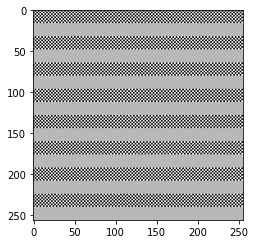

In [225]:
level = 184
test = graybars(level)
# print(test)

# print(np.mod(0,2))

x = np.random.uniform(0, 255, (256,256))
# plt.figure()
test = test.astype(np.uint8)
plt.imshow(test,cmap=plt.cm.gray,vmin=0,vmax=255)
# save to tif
png1 = io.BytesIO()
plt.savefig(png1, format="png")
img_out = Image.open(png1)
img_out.save("gray_matching.tif")
png1.close()

[[0.2911596  0.81767465 0.62695115 0.31864003 0.75997409]
 [0.71536376 0.82994435 0.72717002 0.91551016 0.78544347]
 [0.41604818 0.85393605 0.94055442 0.29837502 0.34488657]
 [0.83364891 0.70883451 0.63331749 0.85497245 0.85256178]
 [0.76028918 0.43284251 0.67681981 0.22828032 0.17429772]]


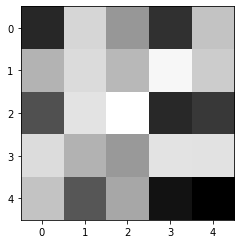

In [226]:
# Set the figure size
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

# Random data points
data = np.random.rand(5, 5)
print(data)

# Plot the data using imshow with gray colormap
plt.imshow(data, cmap='gray')

# Display the plot
plt.show()

In [227]:
# calculate gamma
g = level
gamma = -np.log(2)/(np.log(g) - np.log(255))
print("gamma is: ", gamma)

gamma is:  2.1240826157194195


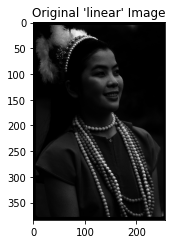

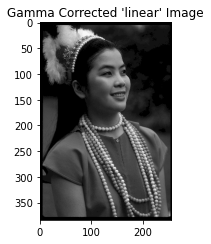

In [228]:
linearim = Image.open("linear.tif")
plt.figure()
plt.title("Original 'linear' Image")
plt.imshow(linearim, cmap=plt.cm.gray)

y = np.array(linearim)
rows, cols = np.shape(y)
x = np.zeros((rows,cols))
for i in range(rows):
    for j in range(cols):
        x[i,j] = 255*((y[i,j]/255)**(1/gamma))
        
plt.figure()
plt.title("Gamma Corrected 'linear' Image")
plt.imshow(x,cmap=plt.cm.gray)
png1 = io.BytesIO()
plt.savefig(png1, format="png")
img_out = Image.open(png1)
img_out.save("corrected_linear.tif")
png1.close()

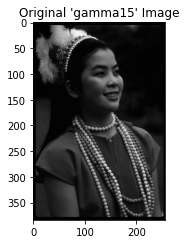

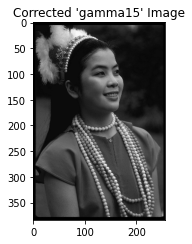

In [229]:
gamma1 = 1.5
gamma2 = gamma
gammatot = gamma1/gamma2

gammaim = Image.open("gamma15.tif")
plt.figure()
plt.title("Original 'gamma15' Image")
plt.imshow(gammaim, cmap=plt.cm.gray)

x1 = np.array(gammaim)
rows, cols = np.shape(x1)
x2 = np.zeros((rows,cols))
for i in range(rows):
    for j in range(cols):
        x2[i,j] = 255*((x1[i,j]/255)**(gammatot))
        
plt.figure()
plt.title("Corrected 'gamma15' Image")
plt.imshow(x2,cmap=plt.cm.gray)
png1 = io.BytesIO()
plt.savefig(png1, format="png")
img_out = Image.open(png1)
img_out.save("corrected_gamma15.tif")
png1.close()